# Prompt engineering for Data analysts !


# 1.. 4 key components of Prompt Engineering !


In [ ]:
'''

Hi all , in this module , we will learn about Prompt Engineering !


Que : Why we are learning Prompt Engineering ?
Ans : Generative AI works mainly on prompts.
     The better and clearer your prompt is, the better and more accurate the AI output will be.

    So, to get the best results from GenAI, we must learn how to design effective prompts & thats where Prompt Engineeing comes !


'''

In [ ]:
'''
⭐ What is Prompt Engineering ?


Prompts are instructions/commands that guides the LLM to generate the output you want..
Engineering → Designing those instructions smartly



Prompt Engineering = The art of Writing clear, specific prompts so the AI gives better and accurate answers..
Instead of giving a simple instruction like:


Go to ChatGPT & ask : 
❌ “Recommend a book.”
ChatGPT will give you generic answer :


But if You give a clear, specific instruction :
✅ “Recommend an AI book for beginners.”

Because…

➤ The more specific your prompt,
➤ the better and more accurate the will be GenAI response.


'''

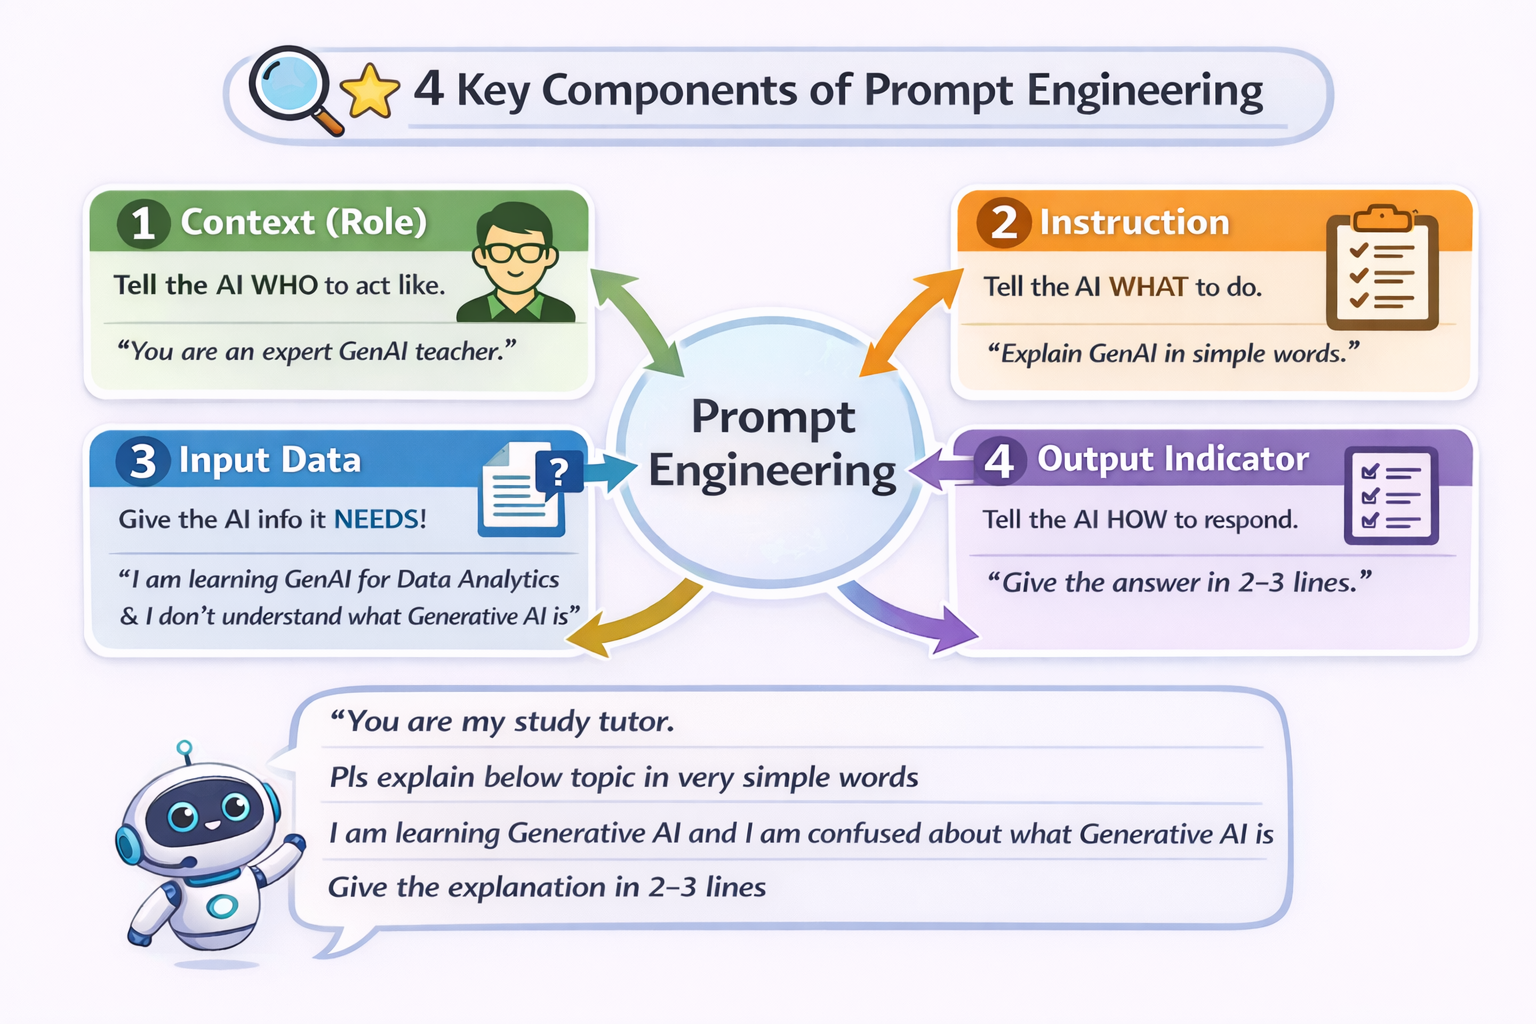

In [ ]:
'''
Based on research , there are 4 imp critical components of Prompt Engineering : 

1️⃣ Context (Role) : Tells the AI who it should act like.
“You are an expert GenAI teacher.”

2️⃣ Instruction : Tells the AI what task to perform.
“Explain GenAI in simple words.”

3️⃣ Input Data : Gives the AI the information it needs.
“I am learning GenAI for Data Analytics and I don’t understand ‘what is GenAI.”

4️⃣ Output Indicator : Tells the AI how the answer should be formatted
“Give the answer in 2–3 lines.”



“You are my study tutor.
Please explain the topic in very simple words.
I am learning GenAI for Data Analytics on Udemy and I’m confused about ‘GenAI’.
Give the explanation in 2–3 lines.”

'''

In [12]:
from langchain_google_genai import GoogleGenerativeAI

In [9]:
llm = GoogleGenerativeAI(
    api_key = gemini_api_key,
    model = "gemini-2.5-flash",
    temperature=0.0
)


## temperature = 0.2 means Output is Slightly flexible & can have Stable answers..

In [10]:
# 3) Simple prompt
prompt = "Explain what data analytics is in 2 lines for beginners."

In [11]:
response = llm.invoke(prompt)

print(response)

Data analytics is the process of examining raw data to uncover trends, patterns, and insights. It helps individuals and organizations make more informed decisions and predict future outcomes.


# 3.. Prompt Template for Analytics (Reusable)

In [ ]:
'''

Lets understand how to design prompt template which can be re-usable !
Think of Like this , if we pass (task , data) to that template , it will solve that task !



✅ This means:
- We don’t have to write prompts again and again
- We just change the task (EDA / Cleaning / Plot / Report)
- And change the input data (df columns / sample rows)

'''

In [1]:
# Prompt Template (Reusable)
def analytics_prompt(task , dataset_info):
    prompt = f"""
    
## we are giving role to "LLM" so that model will generate more professional answer like a Data Analyst..   
You are a Data Analyst.

## In placeholder or curly braces, u can mention task that u can assign to your LLM in near future !
TASK : {task}

DATASET INFO : {dataset_info}

## let me some strict rules for my model :
Rules:
- Explain in very simple words
- Keep answer short
"""
    return prompt


In [ ]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"R:\All_Datasets\Sample_datasets/SampleSuperstore.csv")

In [4]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
task = "Summarize key insights I should check in this dataset."
dataset_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit']


In [17]:
prompt = analytics_prompt(task, dataset_cols)

In [18]:
response = llm.invoke(prompt)
print(response)

Here are the key insights to check:

1.  **Profitability:** See which `Category`, `Sub-Category`, `Region`, and `Segment` make the most (or least) `Profit`.
2.  **Discount Effect:** Check how `Discount` levels impact `Profit` and `Sales`.
3.  **Top Sellers:** Find the best-selling `Category` and `Sub-Category` by `Sales`.


# 4.. Getting JSON Output from LLM

In [ ]:
'''

If u ask LLM to tell summarize your data , 
then Normally LLM generally give output in Paragraphs , 


So lets design a prompt !

'''

In [13]:
prompt = f"""
You are a senior Data Analyst.

Task:
Summarize this dataset clearly for a beginner.

Dataset columns:
{dataset_cols}

Rules:
1) Identify the most likely target column (for prediction/analysis)
2) Mention the most important features that can impact business performance
3) Mention the most common data-quality issues expected in this dataset
4) Keep it short and practical (no long theory)


"""


In [14]:
response = llm.invoke(prompt)

In [15]:
# Output text
print(response)

Okay, let's break down this dataset for a beginner.

This dataset appears to be a record of sales transactions, likely from a retail or e-commerce business, detailing what was sold, where, to whom, and the financial outcome.

1.  **Most Likely Target Column:**
    The most likely target column for prediction or in-depth analysis is **'Profit'**. Businesses ultimately want to understand what drives their profit, how to increase it, and what factors lead to losses. 'Sales' is also a very strong candidate if the primary focus is on revenue generation.

2.  **Most Important Features Impacting Business Performance:**
    *   **'Category' & 'Sub-Category'**: These tell you *what* products are selling well (or poorly), guiding inventory and marketing decisions.
    *   **'Region', 'State', 'City'**: These identify *where* your business is performing strongly or weakly, informing geographical expansion or targeted campaigns.
    *   **'Discount'**: This is crucial as it directly impacts profit

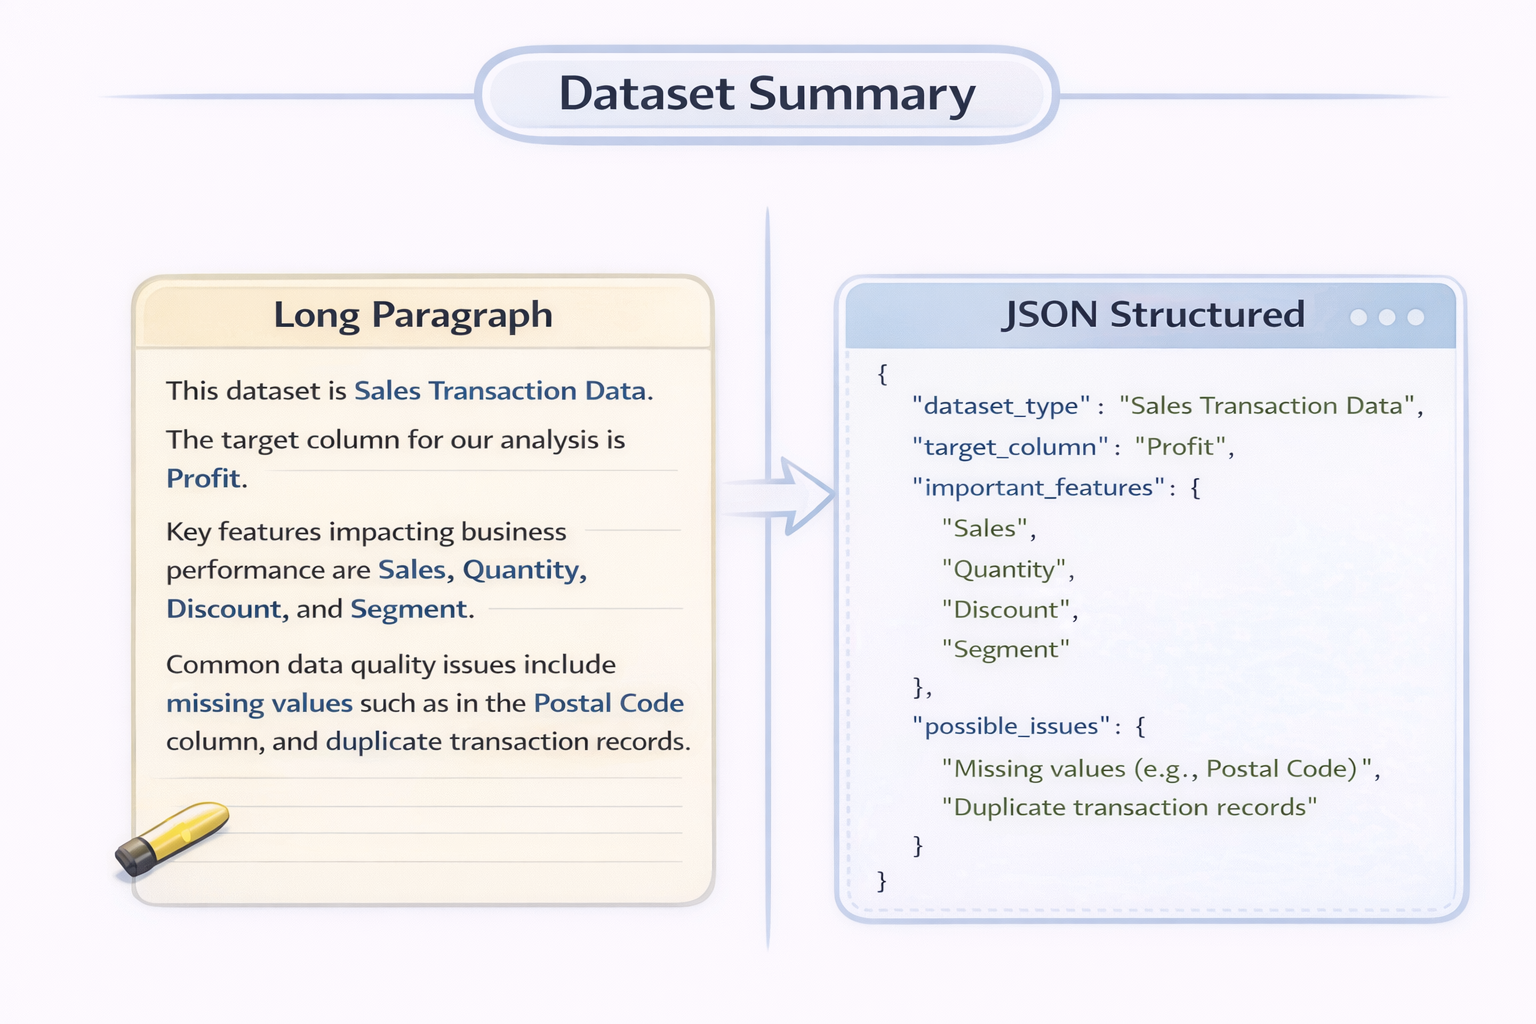

In [ ]:
'''

& if we have long paragraphs , then it is difficult to understand information
Thats where JSON comes , which will return output in more structured way :


Now the ques is : WHY JSON only ?

So JSON is like a neat box format
where information are properly arranged in key-value pairs..
where :
    key represents label
    value represents value


{
  "dataset_type": "Retail Sales Dataset",
  "target_column": "Profit",
  "important_features": ["Sales", "Discount", "Category", "Region"],
  "possible_issues": ["missing values", "outliers", "wrong data types"]
}


it means JSON give u 
    Structured data 
    JSON data can be store easily in file/database bcz they are structured !



'''

In [ ]:
'''

So lets design a prompt just to obtain your output in JSON like structure !


'''

In [19]:
prompt = f"""
You are a Data Analyst.

Give dataset summary in JSON only.

Dataset columns:
{dataset_cols}

Rules:
- Identify the most likely target column (for prediction/analysis)
- Mention important features that impact business performance
- Mention common data quality issues for this kind of dataset
- Do not add extra text. Output ONLY JSON.

Return JSON in this format only:
{{
  "dataset_type": "",
  "target_column": "",
  "important_features": [],
  "possible_issues": []
}}

"""

In [20]:
response = llm.invoke(prompt)


In [21]:
# Output text
print("LLM Output:\n", response)

LLM Output:
 ```json
{
  "dataset_type": "Sales Transaction Data",
  "target_column": "Profit",
  "important_features": [
    "Sales",
    "Quantity",
    "Discount",
    "Category",
    "Sub-Category",
    "Region",
    "Segment"
  ],
  "possible_issues": [
    "Missing values (e.g., Postal Code)",
    "Outliers in numerical columns (Sales, Quantity, Discount, Profit)",
    "Inconsistent categorical data (e.g., different spellings for City, State, Category)",
    "Data type mismatches (e.g., Postal Code stored as numeric losing leading zeros)",
    "Duplicate transaction records"
  ]
}
```


In [28]:
# Sometimes LLM adds extra text, so we try to extract JSON portion


start_index = response.find("{") ## gives u index where this "{" is found..
end_index = response.rfind("}") + 1 ## gives u index where this "}" is found..Why +1 bcz in Python slicing,end index is excluded
json_text = response[start_index : end_index]



In [29]:
import json

In [30]:
data = json.loads(json_text)

print("\nParsed JSON Output:")
data


Parsed JSON Output:


{'dataset_type': 'Sales Transaction Data',
 'target_column': 'Profit',
 'important_features': ['Sales',
  'Quantity',
  'Discount',
  'Category',
  'Sub-Category',
  'Region',
  'Segment'],
 'possible_issues': ['Missing values (e.g., Postal Code)',
  'Outliers in numerical columns (Sales, Quantity, Discount, Profit)',
  'Inconsistent categorical data (e.g., different spellings for City, State, Category)',
  'Data type mismatches (e.g., Postal Code stored as numeric losing leading zeros)',
  'Duplicate transaction records']}

# 5.. Hallucination Handling (Verification Prompt)

In [ ]:
'''
What is Hallunication ?

When LLMs or AI like ChatGPT , Gemini gives wrong information but says it very confidently, as if it is true.
& you need to control this hallucination !


Like when upload pizza image to ChatGPT & u ask for Nutritional info , 
If u will ask first time , u may have some nutrional info
If u ask second time , u may have some different nutrional values

Every time u will ask , u will keep on having different nutrional values !



Thats what Hallucination is !
👉 Bcz it is mostly guessing, because from an image it cannot know the exact ingredients, size, cheese amount, oil, brand, etc.


So ChatGPT may give confident numbers, but those numbers can be incorrect..
✅ That is called AI hallucination (confident but not verified info).


'''

In [ ]:
'''

So lets design a prompt to understand what Hallucination is & how to handle it !


'''

In [54]:
prompt = """

Question :
Which month has highest sales in superstore?

Answer in 2 lines only..

"""

In [55]:
response = llm.invoke(prompt)
print(response)

December has the highest sales in the superstore dataset.
It consistently shows the highest sales across all years, totaling over $1.2 million.


In [ ]:
'''
Every time , your Output keeps on changing !

Ist time : November has the highest sales in the superstore dataset.

2nd time : December has the highest sales in the superstore dataset.
            It consistently shows the highest sales across all years, totaling over $1.2 million.


'''

In [ ]:
## Thats what Hallucination is !
## Que is : how to handle Hallucination ?

## say to LLM :  “If you are not sure, say I don’t know”

In [47]:
prompt = """
You are a strict data analyst.

Question:
Which month has highest sales?

Rules:
1) If data is not provided, say: "I don't know - data not given"
2) Do NOT guess.
3) Ask what data you need to answer.

Answer in 2 lines only.
"""

In [48]:
response = llm.invoke(prompt)
print(response)

I don't know - data not given.
Please provide monthly sales data.
